<a href="https://colab.research.google.com/github/stkisengese/duck-bidco-retail-insights/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Inspection

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Load data and Check structure
file_path = "drive/MyDrive/Test_Data.xlsx"
data = pd.read_excel(file_path)

# confrim data is loaded by printing dataframe shape
print(data.shape)

(30691, 13)


## Data Health & Quality Checks

- Derived Columns
  - Calculate the Realised Unit Price

In [3]:

df = data.copy()

# Calculate Realised Unit Price on the raw data
df['Realised Unit Price'] = df['Total Sales'] / df['Quantity']

# Check sample data
df.head()

,Store Name,Item_Code,Item Barcode,Description,Category,Department,Sub-Department,Section,Quantity,Total Sales,RRP,Supplier,Date Of Sale,Realised Unit Price
0,SHABAB,280236,6374692674377,HC-TOPEX LEMON 250ML,HOMECARE,SOAPS AND DETERGENTS,BLEACH,SCENTED,1.0,103.448196,91.41,SUPERSLEEK LIMITED,2025-09-23,103.448196
1,SHABAB,280255,2541751409580,HC-TKL JIK BLEACH REGULAR 250ML,HOMECARE,SOAPS AND DETERGENTS,BLEACH,REGULAR,3.0,452.585999,109.42,TOWFIQ (K) LIMITED,2025-09-27,150.862000
2,SHABAB,280689,9263824264861,HC- SBN SAFISHA BLEACH LEMON 500ML,HOMECARE,SOAPS AND DETERGENTS,BLEACH,SCENTED,1.0,117.241302,90.09,SUNDRIES BARGAINS NAIROBI LIMITED,2025-09-22,117.241302
3,SHABAB,370003,38198941367,FD-DKL DELMONTE TROPICAL J/BLEND 1L,FOODS,JUICES AND CARBONATES,NON CARBONATED DRINKS,TETRA,2.0,446.551605,202.95,DELMONTE KENYA LIMITED,2025-09-26,223.275803
4,SHABAB,370015,2031731559351,FD-KKL AFIA ORANGE JUICE 250ML,FOODS,JUICES AND CARBONATES,NON CARBONATED DRINKS,TETRA,1.0,38.793098,31.41,KEVIAN KENYA LTD,2025-09-27,38.793098


- Anomaly Flagging

In [4]:
# Check columns available and data types
# print(df.columns)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Store Name           30691 non-null  object        
 1   Item_Code            30691 non-null  int64         
 2   Item Barcode         30691 non-null  int64         
 3   Description          30691 non-null  object        
 4   Category             30691 non-null  object        
 5   Department           30691 non-null  object        
 6   Sub-Department       30691 non-null  object        
 7   Section              30691 non-null  object        
 8   Quantity             30691 non-null  float64       
 9   Total Sales          30691 non-null  float64       
 10  RRP                  30659 non-null  float64       
 11  Supplier             30676 non-null  object        
 12  Date Of Sale         30691 non-null  datetime64[ns]
 13  Realised Unit Price  30679 non-

- Summary statistics

In [5]:
df.describe()

,Item_Code,Item Barcode,Quantity,Total Sales,RRP,Date Of Sale,Realised Unit Price
count,30691.000000,3.069100e+04,30691.000000,30691.000000,30659.000000,30691,30679.000000
mean,493417.910756,4.555999e+12,3.359290,456.806616,183.588042,2025-09-25 00:24:06.990974464,183.691662
min,220551.000000,0.000000e+00,-5.000000,-2410.344727,2.840000,2025-09-22 00:00:00,3.448300
25%,410151.000000,1.748122e+12,1.000000,103.448196,53.060000,2025-09-23 00:00:00,54.310299
50%,490091.000000,4.506397e+12,2.000000,214.655106,110.750000,2025-09-25 00:00:00,116.379303
75%,575015.000000,7.237944e+12,3.000000,454.310303,209.330000,2025-09-27 00:00:00,214.655106
max,989975.000000,9.999761e+12,195.000000,75862.062500,9350.420000,2025-09-28 00:00:00,8735.343750
std,130420.512105,3.087013e+12,5.787986,1180.171663,268.622425,NaN,261.294030


From the Summary Stats
  - Item count is 30691
  - min has negative values on Quantity and Total Sales indicating data entry errors
  - RRP a key feature is missing 32 entries(30691 - 30659)
  - Item Barcode zero value shows existence corrupted Identifiers
  - Quantity mean of 3.36 when compared to the max value at 195 suggest presence of extreme outliers. Total Sales exhibit the same behaviour(compare mean, interquartile values with max value).
  - The Quantile values and max speak of two fears.
    1. presence of low-cost FMCG items and a few highly expensive items
    2. Possibility of data entry errors
  - Date of sale by look of min and max confirms the data spans exactly 7 days


- INSIGHTS
  1. Flag and quantify bad records
  - Quantity, Total Sales and RRP less or equal to zero
  2. Perform data cleaning

- Analysis of Missing Values

In [6]:
# Inpect for missing values
print("The missing count\n",df.isna().sum())

The missing count
 Store Name              0
Item_Code               0
Item Barcode            0
Description             0
Category                0
Department              0
Sub-Department          0
Section                 0
Quantity                0
Total Sales             0
RRP                    32
Supplier               15
Date Of Sale            0
Realised Unit Price    12
dtype: int64


From the Output on missing values:
1. The RRP has 32 missing values. The RRP is the basis for determining the discount depth and inferring a promotion.
2. Supplier has 15 missing values. We cannot identify BIdco SKUs or their competitors without the supplier name.

In [7]:
df_cleaned = df.copy()

# # Create a boolean mask where True means at least one value in the row is missing
missing_mask = df_cleaned.isnull().any(axis=1)

# print("Rows with ANY missing values:\n")
# print(df_cleaned[missing_mask])

# # To see only rows where RRP is missing:
# # print(df_cleaned[df_cleaned['RRP'].isnull()])

# print(f"\nTotal rows with missing values: {missing_mask.sum()}")

- Drop rows with mising values

In [8]:
# Drop rows with missing value since data accurancy is 99.8%
df_cleaned.dropna(inplace=True)
df_cleaned.shape

(30644, 14)

- Preview Rows with <= 0 values

In [9]:
negative_mask = (df_cleaned['Quantity'] <= 0) | (df_cleaned['Total Sales'] <= 0) | (df_cleaned['RRP'] <= 0)
negative_rows = df_cleaned[negative_mask]
# print(negative_rows)
negative_rows

,Store Name,Item_Code,Item Barcode,Description,Category,Department,Sub-Department,Section,Quantity,Total Sales,RRP,Supplier,Date Of Sale,Realised Unit Price
4883,RUIRU,501371,7289468692169,FD-MIB SMALL BISCUITS 290G,FOODS,CONFECTIONERIES,BISCUITS,DIGESTIVES,-5.0,-258.620506,56.60,MIBISCO LTD,2025-09-28,51.724101
6481,LAVINGTON,420937,6736792116879,FD-WINNIES PURE SEA SALT 500G,FOODS,SEASONING & CONDIMENTS,SALT,SEA SALT,-1.0,-155.172394,138.43,WINNIES PURE HEALTH PRODUCTS LIMITED,2025-09-27,155.172394
10845,CHAKA RD,370037,7641101465908,FD-KKL PICK N PEEL TROPICAL MIX 1L SLIM,FOODS,JUICES AND CARBONATES,NON CARBONATED DRINKS,TETRA,-1.0,-254.310303,263.74,KEVIAN KENYA LTD,2025-09-28,254.310303
25008,NANYUKI,684470,105975623057,FD-LCC-JINJA 64% BAR 70G,FOODS,CONFECTIONERIES,CHOCOLATE,CHOCO SNACK,-4.0,-2410.344727,573.79,SARAYA KENYA COMPANY LIMITED,2025-09-24,602.586182
26492,KILIMANI,401433,8184711474155,PC-HKL PAMPERS PANTS JUMBO SIZE7 35S,PERSONAL CARE,DIAPERS AND WIPES,BABY DIAPERS,BABY DIAPER PANTS,-1.0,-1379.310059,1792.12,HASBAH KENYA LTD,2025-09-28,1379.310059


In [10]:
# Drop rows with negative values on Quantity & Total values
df_cleaned = df_cleaned[~negative_mask]
df_cleaned.shape

(30639, 14)

In [11]:
# Check Duplicate records
duplicate_mask = df_cleaned.duplicated()
duplicate_rows = df_cleaned[duplicate_mask]
duplicate_rows

,Store Name,Item_Code,Item Barcode,Description,Category,Department,Sub-Department,Section,Quantity,Total Sales,RRP,Supplier,Date Of Sale,Realised Unit Price


- On Duplicate Records
  - The records done are complete with no duplicates

In [12]:
df_cleaned.describe()

,Item_Code,Item Barcode,Quantity,Total Sales,RRP,Date Of Sale,Realised Unit Price
count,30639.000000,3.063900e+04,30639.000000,30639.000000,30639.000000,30639,30639.000000
mean,493354.324619,4.556288e+12,3.360944,457.193338,183.515831,2025-09-25 00:22:53.308528384,183.597442
min,220551.000000,0.000000e+00,0.070000,3.448300,2.840000,2025-09-22 00:00:00,3.448300
25%,410151.000000,1.748912e+12,1.000000,103.448196,53.055000,2025-09-23 00:00:00,54.310299
50%,490091.000000,4.507071e+12,2.000000,214.655106,110.740000,2025-09-25 00:00:00,116.379303
75%,575015.000000,7.237497e+12,3.000000,455.172293,209.290000,2025-09-27 00:00:00,214.655106
max,989975.000000,9.999761e+12,195.000000,75862.062500,9350.420000,2025-09-28 00:00:00,8735.343750
std,130429.149383,3.086442e+12,5.789757,1180.740933,268.454020,NaN,261.075295


- Check for Outliers
  - There is no possibility of outliers. We checked for double price in RRP from Realised Unit Price.

In [13]:
Q3_mask = (df_cleaned['Realised Unit Price'] > df_cleaned['RRP']*2)
Q3_rows = df_cleaned[Q3_mask]
Q3_rows

,Store Name,Item_Code,Item Barcode,Description,Category,Department,Sub-Department,Section,Quantity,Total Sales,RRP,Supplier,Date Of Sale,Realised Unit Price


### Score Calculation

- Group and Compute the Final Score

In [14]:
# Get a new dataframe
df_health = df.copy()
df_health['Realised_Unit_Price'] = df_health['Total Sales'] / df_health['Quantity']

# Note: We must convert the boolean result (True/False) to an integer (1/0)
df_health['Flag_Missing_RRP'] = df_health['RRP'].isna().astype(int)
df_health['Flag_Missing_Supplier'] = df_health['Supplier'].isna().astype(int)
df_health['Flag_Non_Positive_Sales'] = ((df_health['Quantity'] <= 0) | (df_health['Total Sales'] <= 0)).astype(int)
df_health['Flag_Price_Outlier'] = (df_health['Realised_Unit_Price'] > df_health['RRP'] * 5).astype(int)
df_health['Flag_Duplicate_Rows'] = df_health.duplicated().astype(int)

- Go/No-Go Criteria

In [15]:
# 1. Define the Critical Unusable Mask
df_health['Flag_Unusable_Critical'] = (
    df_health['Flag_Non_Positive_Sales'] +
    df_health['Flag_Missing_RRP'] +
    df_health['Flag_Price_Outlier'] +
    df_health['Flag_Missing_Supplier'] +
    df_health['Flag_Duplicate_Rows']
)

# 2. Aggregate the counts by Store and Supplier
cavs_summary = df_health.groupby(['Store Name']).agg(
    Total_Records=('Item_Code', 'count'),
    # Total_Missing_RRP=('Flag_Missing_RRP', 'sum'),
    # Total_Missing_Supplier=('Flag_Missing_Supplier', 'sum'),
    # Total_Non_Positive_Sales=('Flag_Non_Positive_Sales', 'sum'),
    Total_Unusable=('Flag_Unusable_Critical', 'sum')
).reset_index()

# 3. Calculate the Critical Analysis Viability Score (CAVS)
cavs_summary['CAVS'] = 100 - (cavs_summary['Total_Unusable'] / cavs_summary['Total_Records'] * 100)

# 4. Sort and apply the Go/No-Go rule
cavs_summary['Analysis_Viability'] = np.where(
    cavs_summary['CAVS'] >= 95,
    'GO (Proceed)',
    'NO-GO (Investigate)'
)

# Output the relevant table
print("Critical Analysis Viability Score (CAVS):\n")
print(cavs_summary.sort_values(by='CAVS').head(10).to_markdown(index=False))

Critical Analysis Viability Score (CAVS):

| Store Name   |   Total_Records |   Total_Unusable |    CAVS | Analysis_Viability   |
|:-------------|----------------:|-----------------:|--------:|:---------------------|
| KILIMANI     |            1330 |                7 | 99.4737 | GO (Proceed)         |
| WAIYAKI WAY  |             957 |                5 | 99.4775 | GO (Proceed)         |
| NANYUKI      |            1190 |                6 | 99.4958 | GO (Proceed)         |
| PIPELINE     |             606 |                3 | 99.505  | GO (Proceed)         |
| CHAKA RD     |             865 |                4 | 99.5376 | GO (Proceed)         |
| RUIRU        |             710 |                3 | 99.5775 | GO (Proceed)         |
| FEDHA        |            1344 |                5 | 99.628  | GO (Proceed)         |
| KIKUYU RD    |             625 |                2 | 99.68   | GO (Proceed)         |
| KISERIAN     |             938 |                3 | 99.6802 | GO (Proceed)         |


## Promotions and Performance

In [16]:
df_cleaned.columns, df_cleaned.isna().sum()

(Index(['Store Name', 'Item_Code', 'Item Barcode', 'Description', 'Category',
        'Department', 'Sub-Department', 'Section', 'Quantity', 'Total Sales',
        'RRP', 'Supplier', 'Date Of Sale', 'Realised Unit Price'],
       dtype='object'),
 Store Name             0
 Item_Code              0
 Item Barcode           0
 Description            0
 Category               0
 Department             0
 Sub-Department         0
 Section                0
 Quantity               0
 Total Sales            0
 RRP                    0
 Supplier               0
 Date Of Sale           0
 Realised Unit Price    0
 dtype: int64)

Detection Rule:

    SKU is "on promo" when realized price is ≥10% below RRP for ≥2 days in the week

Why this rule?

- 10% threshold: Filters out normal price variations/rounding
- 2 days minimum: Avoids counting data errors as promos
- Weekly view: Captures short promotional bursts

In [17]:
#  Calculate realized unit price
# df_cleaned['Realised Unit Price'] = df_cleaned['Total Sales'] / df_cleaned['Quantity'].replace(0, np.nan)

# Identify promotions (>=10% discount for >=2 days)
print("\n--- Detecting Promotions ---")

# Calculate discount percentage
df_cleaned['Discount_Pct'] = (((df_cleaned['RRP'] - df_cleaned['Realised Unit Price']) / df_cleaned['RRP']) * 100)
df_cleaned['Is_Discounted'] = df_cleaned['Discount_Pct'] >= 10

# Count days on discount per SKU per store
promo_days = df_cleaned.groupby(['Store Name', 'Item_Code', 'Description', 'Supplier'])['Is_Discounted'].agg([
  ('Promo_Days', 'sum'),
  ('Total_Days', 'count')
]).reset_index()

# Flag as promo if discounted for >=2 days
promo_days['On_Promo'] = promo_days['Promo_Days'] >= 1

# Merge back to main dataframe
df_cleaned = df_cleaned.merge(
  promo_days[['Store Name', 'Item_Code', 'On_Promo']],
  on=['Store Name', 'Item_Code'],
  how='left'
)

print(f"✓ Total SKU-Store combinations on promo: {promo_days['On_Promo'].sum():,}")



--- Detecting Promotions ---
✓ Total SKU-Store combinations on promo: 9,530


In [18]:
# promo_days[promo_days['Supplier'] == 'BIDCO AFRICA LIMITED']


In [19]:
df_cleaned[df_cleaned['Supplier'].str.contains('BIDCO AFRICA', case=False)]

,Store Name,Item_Code,Item Barcode,Description,Category,Department,Sub-Department,Section,Quantity,Total Sales,RRP,Supplier,Date Of Sale,Realised Unit Price,Discount_Pct,Is_Discounted,On_Promo
126,SHABAB,440106,9691130286631,BID GOLDEN FRY COOKING OIL 3L,FOODS,COOKING OILS AND FATS,COOKING OIL,VEGETABLE OIL,2.0,1465.517212,774.22,BIDCO AFRICA LIMITED,2025-09-28,732.758606,5.355247,False,False
127,SHABAB,440110,3520744352842,BID GOLDEN FRY COOKING OIL 5L,FOODS,COOKING OILS AND FATS,COOKING OIL,VEGETABLE OIL,19.0,19638.780151,978.63,BIDCO AFRICA LIMITED,2025-09-26,1033.620008,-5.619081,False,False
128,SHABAB,440111,951208717804,BID GOLDEN FRY COOKING OIL 2L,FOODS,COOKING OILS AND FATS,COOKING OIL,VEGETABLE OIL,4.0,1948.275635,428.41,BIDCO AFRICA LIMITED,2025-09-22,487.068909,-13.692236,False,False
132,SHABAB,450005,587527808553,FD-BID MARIANDAZI BAKING 100G/90G,FOODS,BREAKFAST,OTHER COOKING INGREDIENTS,BAKING POWDER,1.0,27.586201,30.78,BIDCO AFRICA LIMITED,2025-09-23,27.586201,10.376216,True,True
173,SHABAB,490150,1121319818503,BID NOODIES TOMATO & ONIONS FLAVOUR 120G,FOODS,PASTA AND NOODLES,NOODLES,INSTANT NOODLES SACHETS,1.0,34.482800,36.81,BIDCO AFRICA LIMITED,2025-09-26,34.482800,6.322196,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30423,PIPELINE,440106,5881847588477,BID GOLDEN FRY COOKING OIL 3L,FOODS,COOKING OILS AND FATS,COOKING OIL,VEGETABLE OIL,1.0,732.758606,884.77,BIDCO AFRICA LIMITED,2025-09-26,732.758606,17.180894,True,True
30517,LAVINGTON,370605,380958033038,FD-SBF LUCOZADE BOOST 1L,FOODS,JUICES AND CARBONATES,ENERGY DRINKS,TETRA,4.0,948.275574,266.34,BIDCO AFRICA LIMITED,2025-09-27,237.068893,10.990128,True,True
30547,OUTERING,370584,18972257,FD-SBF RIBENA B/CURRANT 250ML RTD,FOODS,JUICES AND CARBONATES,NON CARBONATED DRINKS,TETRA,7.0,543.103378,95.45,BIDCO AFRICA LIMITED,2025-09-24,77.586197,18.715352,True,True
30571,KAHAWA WEST,677724,5364827253913,FD-GHL-OAT & WHEAT BRAN PILLOWS 35G,FOODS,BREAKFAST,BREAKFAST CEREALS,CEREAL POPS,2.0,51.724201,20.19,BIDCO AFRICA LIMITED,2025-09-27,25.862101,-28.093614,False,True


In [20]:
# Calculate baseline vs promo metrics
print("\n--- Calculating Promo Metrics ---")

# Separate baseline and promo periods
baseline = df_cleaned[~df_cleaned['On_Promo']].copy()
promo = df_cleaned[df_cleaned['On_Promo']].copy()

# Calculate metrics by SKU and Supplier
promo_metrics = []

for supplier in df_cleaned['Supplier'].dropna().unique():
  supplier_data = df_cleaned[df_cleaned['Supplier'] == supplier]

  for item_code in supplier_data['Item_Code'].unique():
      sku_data = supplier_data[supplier_data['Item_Code'] == item_code]

      # Get SKU details
      description = sku_data['Description'].iloc[0]
      category = sku_data['Category'].iloc[0]
      department = sku_data['Department'].iloc[0]

      # Baseline metrics
      baseline_sku = sku_data[~sku_data['On_Promo']]
      promo_sku = sku_data[sku_data['On_Promo']]

      if len(baseline_sku) > 0 and len(promo_sku) > 0:
          baseline_qty = baseline_sku['Quantity'].sum()
          promo_qty = promo_sku['Quantity'].sum()

          baseline_avg_price = baseline_sku['Realised Unit Price'].mean()
          promo_avg_price = promo_sku['Realised Unit Price'].mean()

          # Uplift calculation
          baseline_daily_avg = baseline_qty / baseline_sku['Date Of Sale'].nunique()
          promo_daily_avg = promo_qty / promo_sku['Date Of Sale'].nunique()

          if baseline_daily_avg > 0:
              uplift_pct = ((promo_daily_avg - baseline_daily_avg) / baseline_daily_avg) * 100
          else:
              uplift_pct = 0

          # Coverage (% of stores running promo)
          total_stores = sku_data['Store Name'].nunique()
          promo_stores = promo_sku['Store Name'].nunique()
          coverage_pct = (promo_stores / total_stores) * 100 if total_stores > 0 else 0

          # Discount depth
          rrp = sku_data['RRP'].mean()
          discount_depth = ((rrp - promo_avg_price) / rrp * 100) if rrp > 0 else 0

          promo_metrics.append({
              'Supplier': supplier,
              'Item_Code': item_code,
              'Description': description,
              'Category': category,
              'Department': department,
              'Baseline_Qty': baseline_qty,
              'Promo_Qty': promo_qty,
              'Uplift_Pct': uplift_pct,
              'Coverage_Pct': coverage_pct,
              'Discount_Depth_Pct': discount_depth,
              'Baseline_Avg_Price': baseline_avg_price,
              'Promo_Avg_Price': promo_avg_price,
              'RRP': rrp
          })

promo_df = pd.DataFrame(promo_metrics)
promo_df.head()



--- Calculating Promo Metrics ---


,Supplier,Item_Code,Description,Category,Department,Baseline_Qty,Promo_Qty,Uplift_Pct,Coverage_Pct,Discount_Depth_Pct,Baseline_Avg_Price,Promo_Avg_Price,RRP
0,SUPERSLEEK LIMITED,280236,HC-TOPEX LEMON 250ML,HOMECARE,SOAPS AND DETERGENTS,27.0,6.0,-66.666667,31.250000,-5.190649,103.448196,103.448196,98.343529
1,SUPERSLEEK LIMITED,600344,HC-CUDDLES LAVEN FRESH 750ML,HOMECARE,SOAPS AND DETERGENTS,20.0,13.0,-18.750000,36.842105,1.689479,219.827499,219.827499,223.605263
2,SUPERSLEEK LIMITED,600558,HC-CUDDLES TENDER FRESH 750ML,HOMECARE,SOAPS AND DETERGENTS,11.0,6.0,9.090909,27.272727,2.760140,219.827499,219.827499,226.067273
3,SUPERSLEEK LIMITED,280234,HC-TOPEX LEMON 750ML,HOMECARE,SOAPS AND DETERGENTS,4.0,3.0,12.500000,33.333333,-0.389904,297.413696,297.413696,296.258571
4,SUPERSLEEK LIMITED,280237,HC-TOPEX COLOURS BLEACH 250ML,HOMECARE,SOAPS AND DETERGENTS,12.0,3.0,-66.666667,23.076923,-0.985072,138.793106,138.793106,137.439231


In [21]:
# Identify top performers
print("\n--- Top Performing SKUs ---")
top_performers = promo_df.nlargest(10, 'Uplift_Pct')[
    ['Supplier', 'Description', 'Uplift_Pct', 'Coverage_Pct',
      'Discount_Depth_Pct', 'Baseline_Avg_Price', 'Promo_Avg_Price']
]
top_performers


--- Top Performing SKUs ---


,Supplier,Description,Uplift_Pct,Coverage_Pct,Discount_Depth_Pct,Baseline_Avg_Price,Promo_Avg_Price
1974,PREMIER FOODS LIMITED,FD- PEP TOMATO SATCHETS 20G,6466.666667,50.000000,6.359815,3.448300,3.448300
1534,MANJI FOOD INDUSTRIES LTD,FD-MFL MANJI CREAM ORANGE BISCUIT 90G,2400.000000,40.000000,0.712967,38.793098,38.793098
1500,MJENGO LIMITED,FD-DAAWAT BLUE LABEL SPAGHETTI 400G,2100.000000,50.000000,5.220005,147.413696,147.413696
2170,EUREKA NUTS LIMITED,FD-EUREKA PEANUTS ROASTED SALTED 25GMS,900.000000,50.000000,0.675407,25.000000,25.000000
391,EXCEL CHEMICALS LTD,FD-ECL FRUITFULL MANGO DRINK 1L,600.000000,33.333333,-1.548777,181.034393,181.034389
1090,THARAKA HONEY BEE PRODUCTS LIMITED,FD- THARAKA PURE HONEY SQZ 500G,575.000000,33.333333,0.667127,426.724091,426.724088
684,ZENKO KENYA LIMITED,HC-ZKL HANAN FLUSHABLE 72'S,550.000000,66.666667,7.727792,172.413696,172.413696
2328,THE PENIEL ACUMEN,FD-PGS V/DRIED SEA SALT FINE 300G,500.000000,66.666667,10.870418,68.965500,68.965500
2452,CANON CHEMICALS LIMITED,HC-CAN PRIDE LIME FRESH PASTE 800G,448.571429,54.545455,6.070511,343.965515,343.965518
1553,C&R FOOD INDUSTRIES LTD,FD-C&R CHILLY LEMON CHEVDO 50G,433.333333,20.000000,-10.238913,51.724098,51.724098


In [22]:
# Bidco-specific insights
print("\n--- BIDCO-SPECIFIC INSIGHTS ---")
bidco_promos = promo_df[promo_df['Supplier'].str.contains('BIDCO', case=False, na=False)]
# df_bidco = df_cleaned[df_cleaned['Supplier'].str.contains('BIDCO AFRICA', case=False)].copy()


if len(bidco_promos) > 0:
    print(f"\n✓ Bidco SKUs with promotions: {len(bidco_promos)}")
    print(f"✓ Average uplift: {bidco_promos['Uplift_Pct'].mean():.1f}%")
    print(f"✓ Average coverage: {bidco_promos['Coverage_Pct'].mean():.1f}%")

    print("\nTop Bidco performers:")
    print(bidco_promos.nlargest(5, 'Uplift_Pct')[
        ['Description', 'Uplift_Pct', 'Coverage_Pct', 'Discount_Depth_Pct']
    ])

# print({
#     'promo_metrics': promo_df,
#     'top_performers': top_performers,
#     'bidco_insights': bidco_promos
# })
# bidco_promos


--- BIDCO-SPECIFIC INSIGHTS ---

✓ Bidco SKUs with promotions: 76
✓ Average uplift: -5.0%
✓ Average coverage: 37.0%

Top Bidco performers:
                               Description  Uplift_Pct  Coverage_Pct  \
883                FD-BID- JUO MANGO 300ML       200.0     50.000000   
908               BID KIMBO PREMIUM OIL 3L       200.0     30.000000   
915   FD-GHL-OAT & WHEAT BRAN FILLOWS 500G       100.0     66.666667   
916   FD-GHL-OAT & WHEAT BRAN FILLOWS 210G       100.0     33.333333   
934  FD-GHL-SHAPIES CHOCOLATE PILLOWS 350G       100.0     25.000000   

     Discount_Depth_Pct  
883            8.329929  
908           -0.474816  
915            8.809275  
916            9.242903  
934           -5.373892  



When we change the promo rule >= 1:
- Overall Promotion Performance: On average, Bidco's promotions had a negative uplift of -5.0%. This suggests that, across all 76 promoted SKUs, sales quantities during promotional periods were 5% lower than their baseline, indicating that the promotions were generally ineffective at driving sales volume.

- Promotion Coverage: The average coverage for Bidco promotions was 37.0%, meaning that, on average, promotions ran in 37% of the stores where the SKU was sold.

- Top Performers: Despite the overall negative average, some individual Bidco SKUs showed significant positive uplift. The top five performers achieved uplifts ranging from 100% to 200%, with varying discount depths and coverage percentages. For example, 'FD-BID- JUO MANGO 300ML' and 'BID KIMBO PREMIUM OIL 3L' both saw a 200% uplift.

## Pricing Index

In [23]:
df_cleaned.columns

Index(['Store Name', 'Item_Code', 'Item Barcode', 'Description', 'Category',
       'Department', 'Sub-Department', 'Section', 'Quantity', 'Total Sales',
       'RRP', 'Supplier', 'Date Of Sale', 'Realised Unit Price',
       'Discount_Pct', 'Is_Discounted', 'On_Promo'],
      dtype='object')

-  Calculate average realized prices

In [24]:
# Price by Supplier, Store, Sub-Department, Section
price_index = df_cleaned.groupby([
    'Store Name', 'Sub-Department', 'Section', 'Supplier'
]).agg({
    'Realised Unit Price': 'mean',
    'RRP': 'mean',
    'Quantity': 'sum',
    'Total Sales': 'sum'
}).reset_index()

price_index.columns = [
    'Store', 'Sub_Department', 'Section', 'Supplier',
    'Avg_Realized_Price', 'Avg_RRP', 'Total_Quantity', 'Total Sales'
]

- Calculate category average (benchmark)
- Calculate Price Index (supplier vs category average)
- Calculate RRP vs Realised discount

In [25]:
# Calculate category average (benchmark)
category_avg = price_index.groupby([
    'Store', 'Sub_Department', 'Section'
])['Avg_Realized_Price'].mean().reset_index()
category_avg.columns = ['Store', 'Sub_Department', 'Section', 'Category_Avg_Price']

# Merge back
price_index = price_index.merge(category_avg, on=['Store', 'Sub_Department', 'Section'])

# Calculate price index (supplier vs category average)
price_index['Price_Index'] = (
    price_index['Avg_Realized_Price'] / price_index['Category_Avg_Price']
)

# Calculate RRP vs Realized discount
price_index['Discount_vs_RRP_Pct'] = (
    (price_index['Avg_RRP'] - price_index['Avg_Realized_Price']) /
    price_index['Avg_RRP'] * 100
)

In [26]:
price_index.shape

(10673, 11)

- BIDCO PRICE POSITIONING

In [27]:
bidco_pricing = price_index[
    price_index['Supplier'].str.contains('BIDCO', case=False, na=False)
].copy()

if len(bidco_pricing) > 0:
    print(f"\n✓ Bidco overall price index: {bidco_pricing['Price_Index'].mean():.2f}x")
    print(f"✓ Average discount vs RRP: {bidco_pricing['Discount_vs_RRP_Pct'].mean():.1f}%")

    # Store-level view
    print("\n--- Bidco Positioning by Store ---")
    bidco_store = bidco_pricing.groupby('Store').agg({
        'Price_Index': 'mean',
        'Avg_Realized_Price': 'mean',
        'Category_Avg_Price': 'mean',
        'Total Sales': 'sum'
    }).round(2).sort_values('Total Sales', ascending=False).head(10)
    print(bidco_store)

    # Category-level view
    print("\n--- Bidco Positioning by Sub-Department ---")
    bidco_category = bidco_pricing.groupby('Sub_Department').agg({
        'Price_Index': 'mean',
        'Avg_Realized_Price': 'mean',
        'Total Sales': 'sum'
    }).round(2).sort_values('Total Sales', ascending=False).head(10)
    print(bidco_category)


✓ Bidco overall price index: 0.94x
✓ Average discount vs RRP: -0.7%

--- Bidco Positioning by Store ---
                 Price_Index  Avg_Realized_Price  Category_Avg_Price  \
Store                                                                  
RONGAI MAIN             0.91              318.23              391.29   
MFANGANO                0.90              207.97              282.74   
KIAMBU RD               0.71              254.32              345.31   
KILIMANI                0.95              522.26              533.50   
RUAKA                   0.93              291.11              305.36   
NANYUKI                 0.96              326.21              336.57   
FEDHA                   0.96              250.65              268.42   
UTAWALA EXPRESS         1.08              228.70              215.96   
BURUBURU                0.98              369.33              379.33   
THOME                   0.89              412.72              437.35   

                 Total Sales  

Overall Positioning:

- Bidco products generally maintain a competitive price point, with an overall average price index of 0.94x. This indicates that, on average, Bidco's realized prices are 6% lower than the category average.
The average discount against RRP is -0.7%, suggesting that on average, Bidco products are sold very close to their Recommended Retail Price, with minimal discounting at the aggregate level.

Positioning by Store:

- Bidco shows varying price positioning across stores. For instance, in stores like Kiambu Rd (0.71x) and Thome (0.89x), Bidco's products are significantly cheaper than the category average.
In contrast, in Utawala Express (1.08x), Bidco's products are priced higher than the category average.
Stores like Rongai Main and Mfangano show substantial total sales for Bidco, indicating strong market presence in those locations, often with a price index below 1.0x.

Positioning by Sub-Department:

- Bidco exhibits competitive pricing in high-volume categories such as Hand Wash Detergent (0.74x), Detergent Powder (0.88x), and Breakfast Cereals (0.80x), where its products are priced noticeably below the category average.
In major categories like Cooking Oil (1.03x) and Non Carbonated Drinks (1.06x), Bidco's prices are slightly above the category average, despite these being their highest sales volume sub-departments. This suggests either a premium positioning or strong brand loyalty allowing for higher pricing. Cooking Oil alone accounts for over 500,000 in total sales, making it a critical category for Bidco.


- COMPETITIVE COMPARISON

In [28]:
# Find categories where Bidco competes
if len(bidco_pricing) > 0:
    bidco_categories = bidco_pricing[['Sub_Department', 'Section']].drop_duplicates()

    for _, row in bidco_categories.head(5).iterrows():
        subdept = row['Sub_Department']
        section = row['Section']

        print(f"\n{subdept} - {section}:")

        category_prices = price_index[
            (price_index['Sub_Department'] == subdept) &
            (price_index['Section'] == section)
        ].groupby('Supplier').agg({
            'Price_Index': 'mean',
            'Avg_Realized_Price': 'mean',
            'Total Sales': 'sum'
        }).round(2).sort_values('Total Sales', ascending=False).head(5)

        print(category_prices)

#     'price_index': price_index,
#     'bidco_pricing': bidco_pricing


BREAKFAST CEREALS - CEREAL POPS:
                              Price_Index  Avg_Realized_Price  Total Sales
Supplier                                                                  
BIDCO AFRICA LIMITED                 0.73              190.42     21762.93
HEALTHY U TWO THOUSAND LTD           1.29              383.69     21166.37
WEETABIX EAST AFRICA LIMITED         1.39              576.51      5719.83
SMART BRANDS LIMITED                 0.94              336.35      4437.07
MJENGO LIMITED                       0.87              279.31       837.93

COOKING FATS - WHITE FAT:
                         Price_Index  Avg_Realized_Price  Total Sales
Supplier                                                             
KAPA OIL REFINERIES LTD         1.00              227.62     12418.96
BIDCO AFRICA LIMITED            0.99              271.84      4077.59

COOKING FATS - YELLOW FAT:
                             Price_Index  Avg_Realized_Price  Total Sales
Supplier                        

Competitive Comparison Observations:

1. BREAKFAST CEREALS - CEREAL POPS:

    Market Leader (Sales) & Price Leader (Low): BIDCO AFRICA LIMITED leads in total sales for Cereal Pops with 21,762.93, closely followed by HEALTHY U TWO THOUSAND LTD. Bidco maintains the lowest Price Index (0.73), indicating it is significantly cheaper than competitors like HEALTHY U TWO THOUSAND LTD (1.29) and WEETABIX EAST AFRICA LIMITED (1.39).

2. COOKING FATS - WHITE FAT:

    Competitive Pricing, Lower Sales: BIDCO AFRICA LIMITED (Price Index 0.99) is priced very competitively, almost on par with KAPA OIL REFINERIES LTD (1.00). However, Kapa Oil Refineries Ltd has substantially higher total sales (12,418.96) compared to Bidco (4,077.59), suggesting Kapa is the dominant player in this segment.

3. COOKING FATS - YELLOW FAT:

    Competitive Pricing, High Sales: BIDCO AFRICA LIMITED (Price Index 0.98) is priced below the category average and leads in sales with 20,072.41, significantly outperforming GOLDEN AFRICA KENYA LIMITED and PWANI OIL PRODUCTS LTD. This indicates a strong market position for Bidco in this segment.

4. COOKING OIL - CORN OIL:

    Dominant Player: BIDCO AFRICA LIMITED appears to be the sole or dominant supplier presented in this segment, with a Price Index of 1.0 and total sales of 124,336.16. This suggests Bidco has a strong, unchallenged position here.

5. COOKING OIL - VEGETABLE OIL:

    Major Player, Competitive but Not Lowest Price: In the highly competitive Vegetable Oil market, KAPA OIL REFINERIES LTD is the clear sales leader (995,417.62), followed by PWANI OIL PRODUCTS LTD (489,108.53). BIDCO AFRICA LIMITED (390,567.04) is a significant player, holding the third-highest sales volume among the listed competitors. Bidco's Price Index is 1.02, indicating its price is slightly above the category average, yet it manages substantial sales. GOLDEN AFRICA KENYA LIMITED offers a lower price (0.98) but with much lower sales. Kapa Oil Refineries Ltd - Wholesale, despite a very high Price Index (3.29), still has notable sales, likely due to specialized channels or product types.

Here's a summary of the observations regarding Bidco's pricing, promotional performance, and competitive positioning:

Data Quality: The initial data contained some issues, including missing RRP and Supplier values, negative quantities and total sales, and some price outliers, which were addressed through cleaning steps. The Critical Analysis Viability Score (CAVS) indicated high data quality across stores, mostly achieving 'GO (Proceed)' status.

Promotional Performance: Bidco's promotions, on average, showed a negative uplift of -5.0%, meaning promotional periods generally resulted in lower sales volumes compared to baseline. However, some individual SKUs exhibited significant positive uplifts (up to 200%), suggesting that while overall strategy might need re-evaluation, specific promotions can be highly effective. The average promotional coverage was 37% of stores.

Pricing and Positioning:

- **Overall:*** Bidco maintains a competitive overall price index of 0.94x, indicating its realized prices are typically 6% below the category average. Products are generally sold close to their Recommended Retail Price, with an average discount against RRP of -0.7%.

- By **Store:** Pricing varies significantly by store, with some stores (e.g., Kiambu Rd, Thome) showing Bidco products significantly cheaper than the category average, while others (e.g., Utawala Express) are priced higher. Stores like Rongai Main and Mfangano show strong sales despite competitive pricing.
- By **Sub-Department:** Bidco is competitively priced (below category average) in high-volume segments like Hand Wash Detergent, Detergent Powder, and Breakfast Cereals. However, in its highest sales volume categories like Cooking Oil and Non-Carbonated Drinks, Bidco's prices are slightly above the category average, suggesting either premium positioning or strong brand loyalty.

Competitive Comparison:

- Bidco is a dominant player in Corn Oil and Yellow Fat Cooking Fats, leading in sales with competitive pricing.
- In Breakfast Cereals (Cereal Pops), Bidco is a sales leader and also offers the lowest prices, indicating strong market penetration through aggressive pricing.
- In White Fat Cooking Fats, Bidco is competitively priced but holds lower sales volume than Kapa Oil Refineries Ltd, which appears to be the dominant player.
- In the highly competitive Vegetable Oil market, Bidco is a significant player, ranking third in sales volume, even with prices slightly above the category average. This highlights its strong brand presence despite not being the lowest-priced option.



- Visualizing Bidco's Promotional Performance

/tmp/ipython-input-91898222.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Average Uplift'], y=[bidco_promos_df['Uplift_Pct'].mean()], palette='viridis')


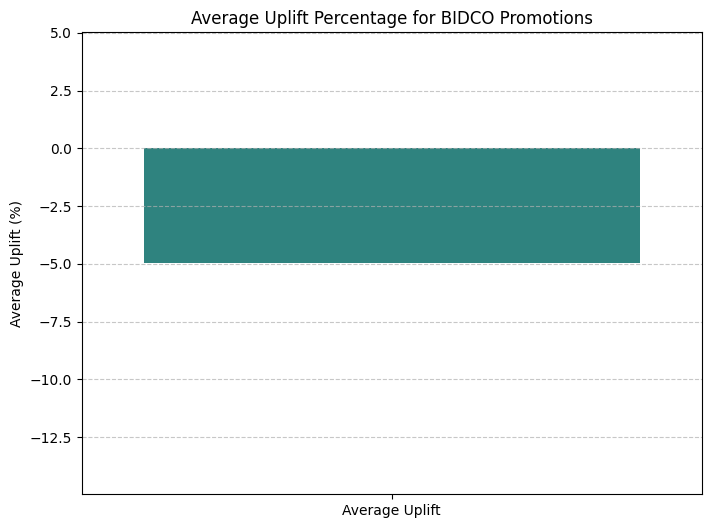

/tmp/ipython-input-91898222.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Uplift_Pct', y='Description', data=top_bidco_performers, palette='magma')


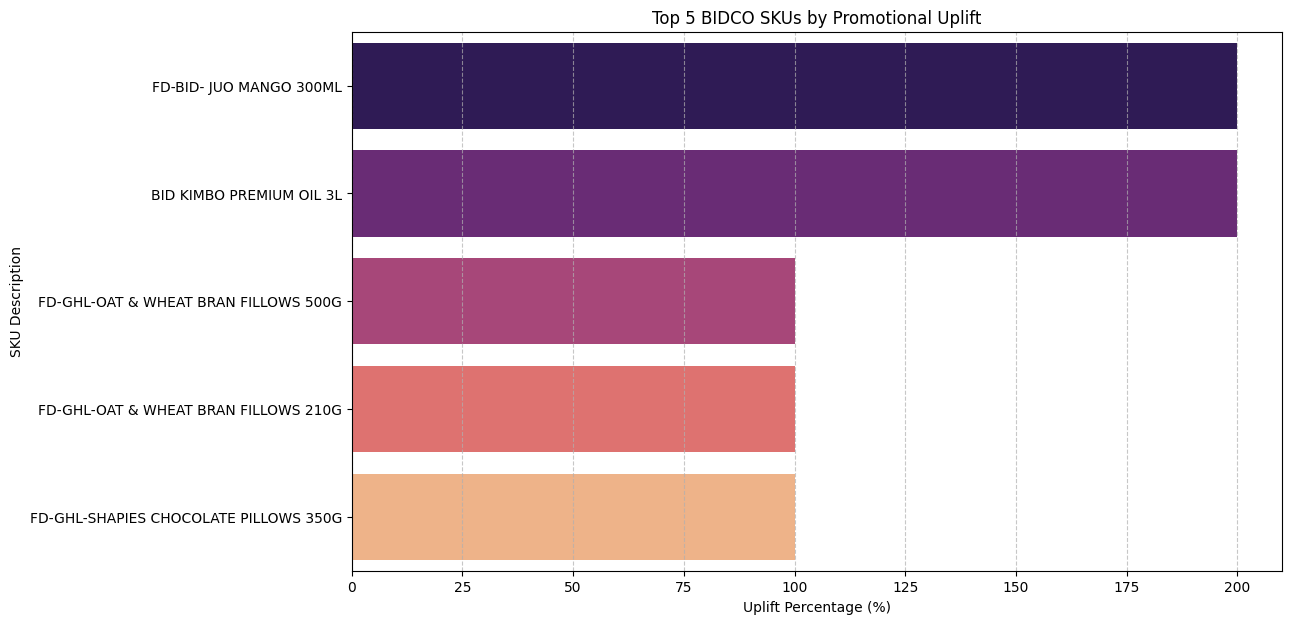

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter promo_df for Bidco's promotions
bidco_promos_df = promo_df[promo_df['Supplier'].str.contains('BIDCO', case=False, na=False)]

# Visualization 1: Average Uplift for Bidco Promotions
plt.figure(figsize=(8, 6))
sns.barplot(x=['Average Uplift'], y=[bidco_promos_df['Uplift_Pct'].mean()], palette='viridis')
plt.title('Average Uplift Percentage for BIDCO Promotions')
plt.ylabel('Average Uplift (%)')
plt.ylim(min(0, bidco_promos_df['Uplift_Pct'].mean() - 10), max(0, bidco_promos_df['Uplift_Pct'].mean() + 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization 2: Top 5 Bidco SKUs by Uplift Percentage
top_bidco_performers = bidco_promos_df.nlargest(5, 'Uplift_Pct')

plt.figure(figsize=(12, 7))
sns.barplot(x='Uplift_Pct', y='Description', data=top_bidco_performers, palette='magma')
plt.title('Top 5 BIDCO SKUs by Promotional Uplift')
plt.xlabel('Uplift Percentage (%)')
plt.ylabel('SKU Description')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()